# Demo of various graph styles / methods

Source: [matplotlib gallery](http://matplotlib.org/examples/pylab_examples/cohere_demo.html)

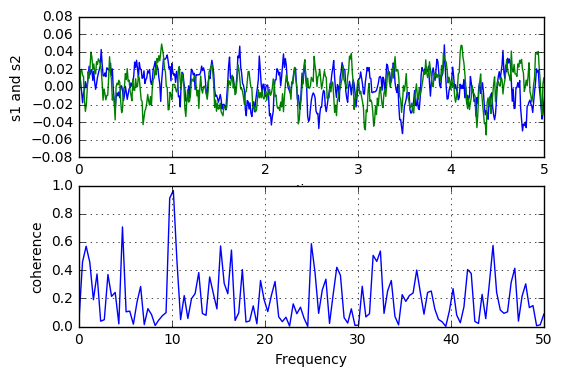

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, 'b-', t, s2, 'g-')
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence')
plt.show()

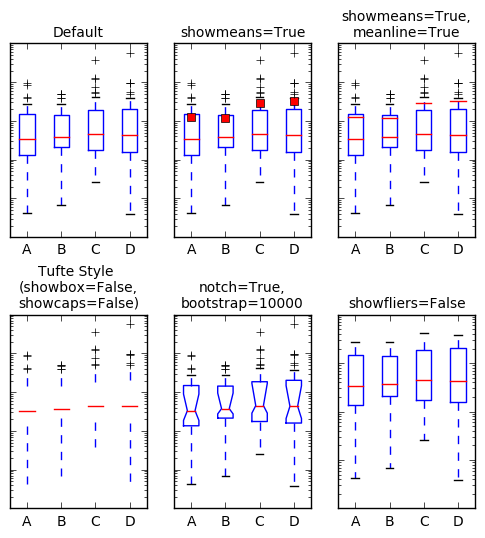

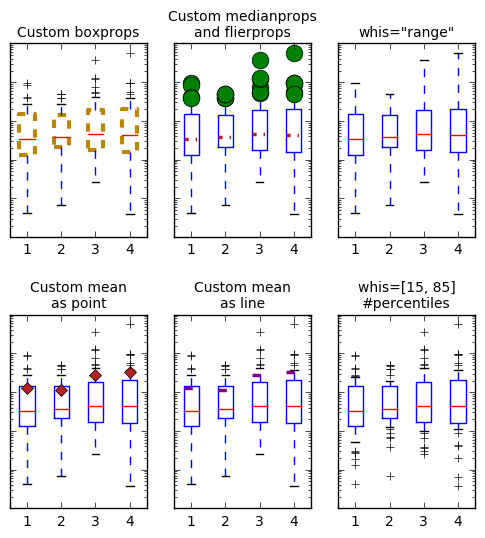

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
axes[1, 0].set_title('Tufte Style \n(showbox=False,\nshowcaps=False)', fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

#fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

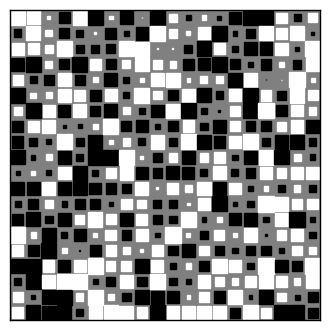

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()

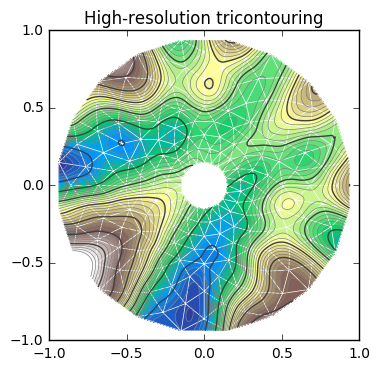

In [2]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math


#-----------------------------------------------------------------------------
# Analytical test function
#-----------------------------------------------------------------------------
def function_z(x, y):
    """ A function of 2 variables """
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = -(2*(np.exp((r1/10)**2) - 1)*30. * np.cos(7.*theta1) +
          (np.exp((r2/10)**2) - 1)*30. * np.cos(11.*theta2) +
          0.7*(x**2 + y**2))
    return (np.max(z) - z)/(np.max(z) - np.min(z))

#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

#-----------------------------------------------------------------------------
# Refine data
#-----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

#-----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
#-----------------------------------------------------------------------------
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, lw=0.5, color='white')

levels = np.arange(0., 1., 0.025)
cmap = cm.get_cmap(name='terrain', lut=None)
plt.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)
plt.tricontour(tri_refi, z_test_refi, levels=levels,
               colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.title("High-resolution tricontouring")

plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:13: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


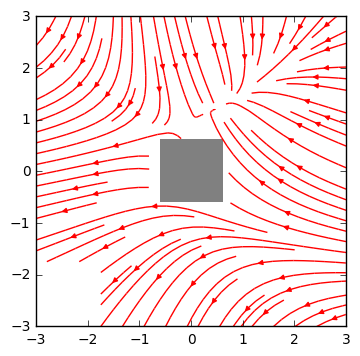

In [3]:
import numpy as np
import matplotlib.pyplot as plt

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = 1
U = np.ma.array(U, mask=mask)
U[:20, :20] = np.nan

plt.streamplot(X, Y, U, V, color='r')

plt.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
           interpolation='nearest', cmap=plt.cm.gray)

plt.show()